In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

In [2]:
# Step 1 - Data Collection

In [3]:
# Loading the pre defined Twitter dataset
data = pd.read_csv('Tweets.csv')
data

,Id,Date,Flag,User,Text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
530968,2196124574,Tue Jun 16 12:03:31 PDT 2009,NO_QUERY,dave_cena,Headed to class
530969,2196124775,Tue Jun 16 12:03:32 PDT 2009,NO_QUERY,JessicaPuchala,@mulho2mj place that used to be called red hot...
530970,2196125069,Tue Jun 16 12:03:35 PDT 2009,NO_QUERY,LeftCoastGirl,@betsymaebartlet that would make me sooooo sad.
530971,2196125212,Tue Jun 16 12:03:34 PDT 2009,NO_QUERY,LanceButcher,"lunch time, got damn my abs sore"


In [4]:
# Step 2 - Data Pre Processing

In [5]:
def preprocess_tweet(text):
    # Convert to string in case the input is not a string (e.g., NaN, numeric values)
    text = str(text)

    # Cleaning - Remove URLs, special characters, and handles
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+', '', text)  # Remove @mentions
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters

    # Normalization - Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Stop Words Removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return " ".join(lemmatized_tokens)

In [6]:
# Apply preprocessing to each tweet in the dataset
data['cleaned_text'] = data['Text'].apply(preprocess_tweet)

In [7]:
# Step 3 - Exploratory Data Analysis

In [8]:
# 1. Finding the Top words in the tweets

In [9]:
# Flatten all tokens into a single list
all_words = [word for text in data['cleaned_text'] for word in text.split()]

# the top_words function
def top_words(words, num):
    return Counter(words).most_common(num)

# Get the top 10 words
top_words_result = top_words(all_words, 10)

# Check the top 10 words result
print("Top 10 Words:", top_words_result)

Top 10 Words: [('day', 33208), ('go', 31948), ('work', 31522), ('get', 31439), ('like', 27398), ('today', 25589), ('got', 25545), ('back', 22902), ('want', 22380), ('going', 22283)]


In [10]:
# 2. Creating word clouds to understand data better.

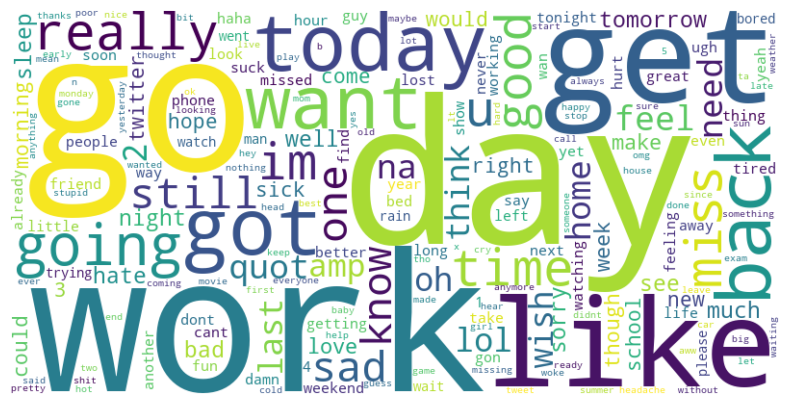

In [11]:
word_freq = Counter(all_words)

# Creating a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# Step 4: Feature Extraction

In [13]:
# Vectorization : We are using TF-IDF Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'cleaned_text' is your preprocessed text column
texts = data['cleaned_text'].tolist()

# Create a TF-IDF Vectorizer instance
tfidf_vectorizer = TfidfVectorizer(max_features=1000) # Limiting to 1000 features for example

# Fit and transform the texts to create a feature matrix
feature_matrix = tfidf_vectorizer.fit_transform(texts)

In [15]:
# Verifying the TF-IDF vectorization

In [16]:
# 1. Inspecting the Shape of the Feature Matrix

In [17]:
print(feature_matrix.shape)

(530973, 1000)


In [18]:
# 2. Examining the vocabulary that the vectorizer has learned from the dataset

In [19]:
print(tfidf_vectorizer.vocabulary_)

{'bummer': 133, 'got': 389, 'david': 221, 'day': 222, 'upset': 909, 'update': 907, 'facebook': 301, 'might': 568, 'cry': 206, 'school': 734, 'today': 872, 'also': 38, 'blah': 107, 'many': 554, 'time': 870, 'ball': 79, 'save': 728, '50': 11, 'rest': 710, 'go': 378, 'whole': 956, 'body': 112, 'feel': 315, 'like': 511, 'fire': 332, 'mad': 546, 'see': 738, 'need': 607, 'hug': 453, 'hey': 430, 'long': 527, 'yes': 994, 'rain': 695, 'bit': 103, 'lol': 524, 'fine': 328, 'thanks': 853, 'nope': 622, 'break': 123, 'city': 169, 'ear': 265, 'watch': 936, 'thought': 861, 'loss': 534, 'idk': 460, 'either': 271, 'never': 610, 'talk': 841, 'anymore': 47, 'would': 979, 'first': 333, 'really': 705, 'though': 860, 'wish': 960, 'miss': 576, 'death': 227, 'hurt': 456, 'film': 323, 'cut': 208, 'ahh': 26, 'ive': 471, 'always': 40, 'wanted': 931, 'love': 537, 'oh': 631, 'dear': 226, 'drinking': 254, 'drink': 253, 'get': 370, 'much': 596, 'done': 245, 'one': 637, 'friend': 358, 'called': 143, 'asked': 61, 'meet

In [20]:
# 3. summarizing the TF-IDF scores to see the most important words on average across all tweets

In [21]:
# Sum tf-idf scores for each feature
sums = feature_matrix.sum(axis=0)
tfidf_scores = [(word, sums[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]
sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Display the top 10 words with the highest scores
for word, score in sorted_tfidf_scores[:10]:
    print(f"Word: {word}, Score: {score}")


Word: work, Score: 10523.187370519354
Word: day, Score: 9674.990746651123
Word: go, Score: 9348.12476481218
Word: get, Score: 8857.484712950903
Word: miss, Score: 8393.13794190894
Word: today, Score: 8142.258848679863
Word: want, Score: 8111.096207033708
Word: like, Score: 8060.237738449194
Word: got, Score: 7679.174559658415
Word: back, Score: 7511.095703670724


In [22]:
# Step 5 - Calculating Polarity Scores for each tweet and labelling it in the dataset to train and test the model

In [30]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Function to assign a label based on the compound score
def label_sentiment(row):
    score = sia.polarity_scores(row)
    if score['compound'] >= 0.1:
        return 'positive'
    elif score['compound'] <= -0.1:
        return 'negative'
    else:
        return 'neutral'

# Calculate polarity for each tweet
data['label'] = data['cleaned_text'].apply(label_sentiment)


In [31]:
# Step 6 - Model Training and Testing

In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'feature_matrix' is your TF-IDF or CountVectorizer output
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, data['label'], test_size=0.4, random_state=42)


In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.78      0.78     74960
     neutral       0.71      0.73      0.72     66641
    positive       0.83      0.79      0.81     70789

    accuracy                           0.77    212390
   macro avg       0.77      0.77      0.77    212390
weighted avg       0.77      0.77      0.77    212390

Accuracy Score: 0.7696501718536655


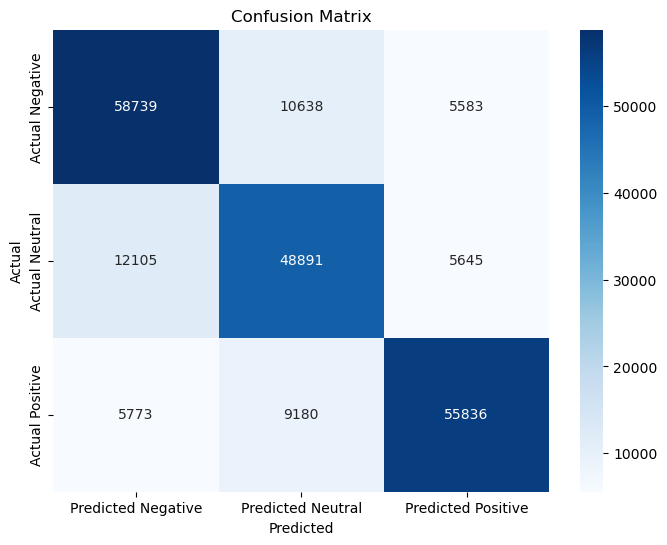

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred are the predictions made by your model
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Neutral', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [28]:
# Step 7- Sentiment Analysis using Keyword-Specific Tweets

In [39]:
import random

def keyword_sentiment_analysis(keyword, Data, model, vectorizer, num_tweets=10):
    # Filter tweets containing the keyword
    keyword_tweets = Data[Data['cleaned_text'].str.contains(keyword, case=False, na=False)]
    
    # If there are fewer than the requested number of tweets, take as many as available
    num_tweets = min(len(keyword_tweets), num_tweets)
    
    # Randomly select a sample of tweets containing the keyword
    sample_tweets = keyword_tweets.sample(n=num_tweets)

    # Vectorize the sample tweets using the same vectorizer used in model training
    tweet_vectors = vectorizer.transform(sample_tweets['cleaned_text'])

    # Predict the sentiment of the sample tweets
    predicted_sentiments = model.predict(tweet_vectors)

    # Display the results
    results = zip(sample_tweets['Text'], predicted_sentiments)  # 'text' should be the raw tweet text
    for tweet, sentiment in results:
        print(f"Tweet: {tweet}\nPredicted Sentiment: {sentiment}\n")

# Example usage:
keyword_sentiment_analysis('football', data, classifier, tfidf_vectorizer)

Tweet: I feel lost now that football seasons finished no sunday league game 2 get up for and no footy on telly 2 watch 
Predicted Sentiment: negative

Tweet: lying motionless after the 5k run and an hr of football!! Im gonna be sore tomorrow 
Predicted Sentiment: negative

Tweet: its not too long before i loose my boyfriend to playing college football for georgia tech 
Predicted Sentiment: positive

Tweet: i'm sad the football season is nearly over 
Predicted Sentiment: negative

Tweet: Saturdays without football are like Fridays without fish 
Predicted Sentiment: neutral

Tweet: Well another day all my friends are in Kings Island so I couldn't really go because fo my football camp! Oh and I still miss BEKAH!!!!! 
Predicted Sentiment: positive

Tweet: @tonfue LOL- Any time- we get football, baseball, hockey, basketball, tennis... all of it! God maybe I am THAT shallow- I hope not! 
Predicted Sentiment: positive

Tweet: @justamoochin amazing iPhone typo. Should say 'Took a football IN T